
### Data Exploration

Python statements that import the standard libraries



In [10]:
import numpy as np
import pandas as pd
import seaborn as sn
import missingno as msno
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [11]:
#read the csv file in a dataframe

def readFile(pathName):
    df = pd.read_csv(pathName)
    return df

In [12]:
def missingno_matrix(df): 
#     %matplotlib inline
    msno.matrix(df)
    print('Observation\nWe can see some missing values in the columns')

In [13]:
def missingno_bar(df):
    msno.bar(df)
    plt.show()
    print('Observation\nmsno.bar is a simple visualization of nullity by column, here you can see customer value has the most number of null values as the height if that bar is small comapred to the remaining bar plots')

In [14]:
def replaceColumnNames(df):
    #rename the columns
    df=df.rename(columns={"Call  Failure": "call_failure", "Complains": "complains", "Subscription  Length": "subs_len", "Charge  Amount": "charge_amount",
                   "Seconds of Use": "seconds_of_use", "Frequency of use": "freq_of_use", "Frequency of SMS": "freq_of_sms", "Distinct Called Numbers": "distinct_call_nums",
                   "Age Group": "age_group", "Tariff Plan": "tariff_plan", "Status": "status", "Age": "age", "Customer Value": "customer_value"})
    return df

In [124]:
def main():
    df = readFile("../data/Customer_churn_raw.csv")
    display(df.head())
    display(df.dtypes)
    missingno_bar(df)
    missingno_matrix(df)

    df = replaceColumnNames(df)
    df['customer_value'].replace(np.nan, 0, inplace=True )
    print("**********************************************************************************************")
    df.hist(bins=70,figsize=(30,20))
    print("**********************************************************************************************")
    df[['age','customer_value']].plot(kind='scatter',x= 'customer_value',y= 'age', figsize=(20,10))
    df[['subs_len','Churn']].plot(kind='scatter',x= 'Churn',y= 'subs_len', figsize=(20,10))

    print("**********************************************************************************************")
    pd.DataFrame(df['age'].value_counts()).plot(kind='bar',figsize=(20,10))
    pd.DataFrame(df['charge_amount'].value_counts()).plot(kind='bar',figsize=(20,10))
    pd.DataFrame(df['call_failure'].value_counts()).plot(kind='bar',figsize=(20,10))
    pd.DataFrame(df['subs_len'].value_counts()).plot(kind='bar',figsize=(20,10))

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Tariff Plan,Status,Age,Customer Value,FN,FP,Churn
0,8,0,38.0,0,4370,71.0,5.0,17.0,1,1,5,197.640,177.8760,69.7640,0
1,O,0,39.0,0,NaN,5.0,7.0,4.0,1,1,6,46.035,41.4315,60.0000,0
2,10,0,37.0,0,2453,60.0,359.0,24.0,1,1,2,1536.520,1382.8680,203.6520,0
3,10,0,38.0,0,4198,66.0,1.0,35.0,1,1,10,240.020,216.0180,74.0020,0
4,3,0,NaN,0,2393,58.0,2.0,33.0,1,1,9,145.805,131.2245,64.5805,0


Call  Failure               object
Complains                   object
Subscription  Length       float64
Charge  Amount              object
Seconds of Use              object
Frequency of use           float64
Frequency of SMS           float64
Distinct Called Numbers    float64
Tariff Plan                  int64
Status                       int64
Age                          int64
Customer Value             float64
FN                         float64
FP                         float64
Churn                        int64
dtype: object

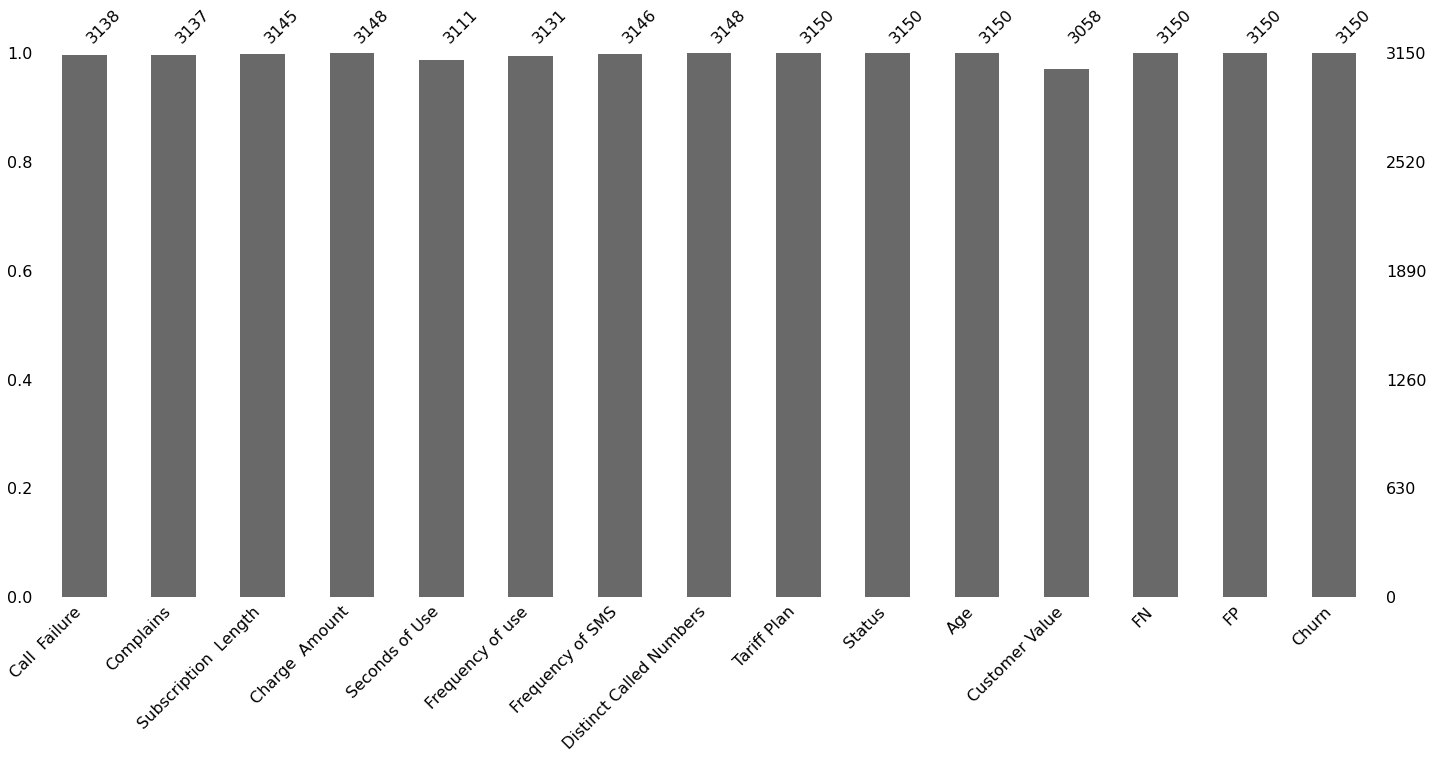

Observation
msno.bar is a simple visualization of nullity by column, here you can see customer value has the most number of null values as the height if that bar is small comapred to the remaining bar plots
Observation
We can see some missing values in the columns
**********************************************************************************************
**********************************************************************************************
**********************************************************************************************


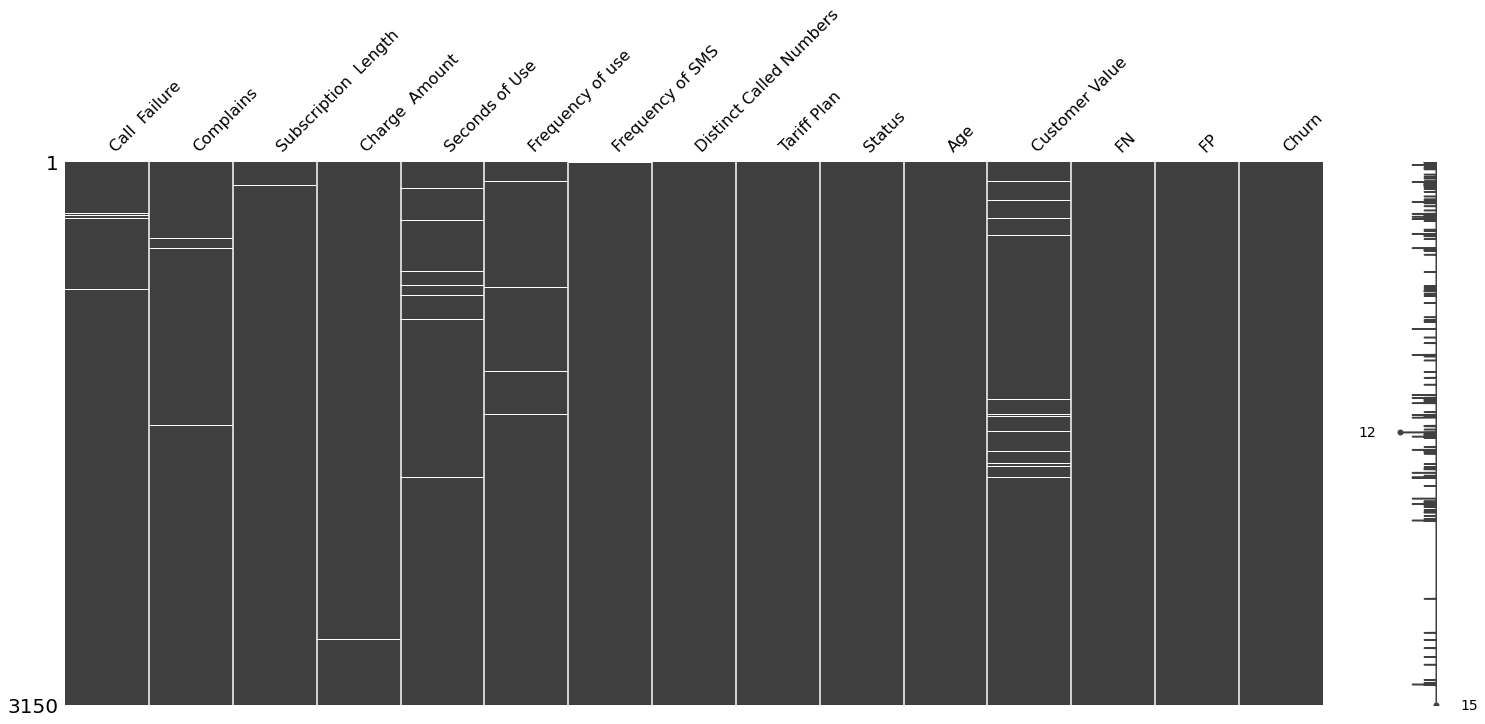

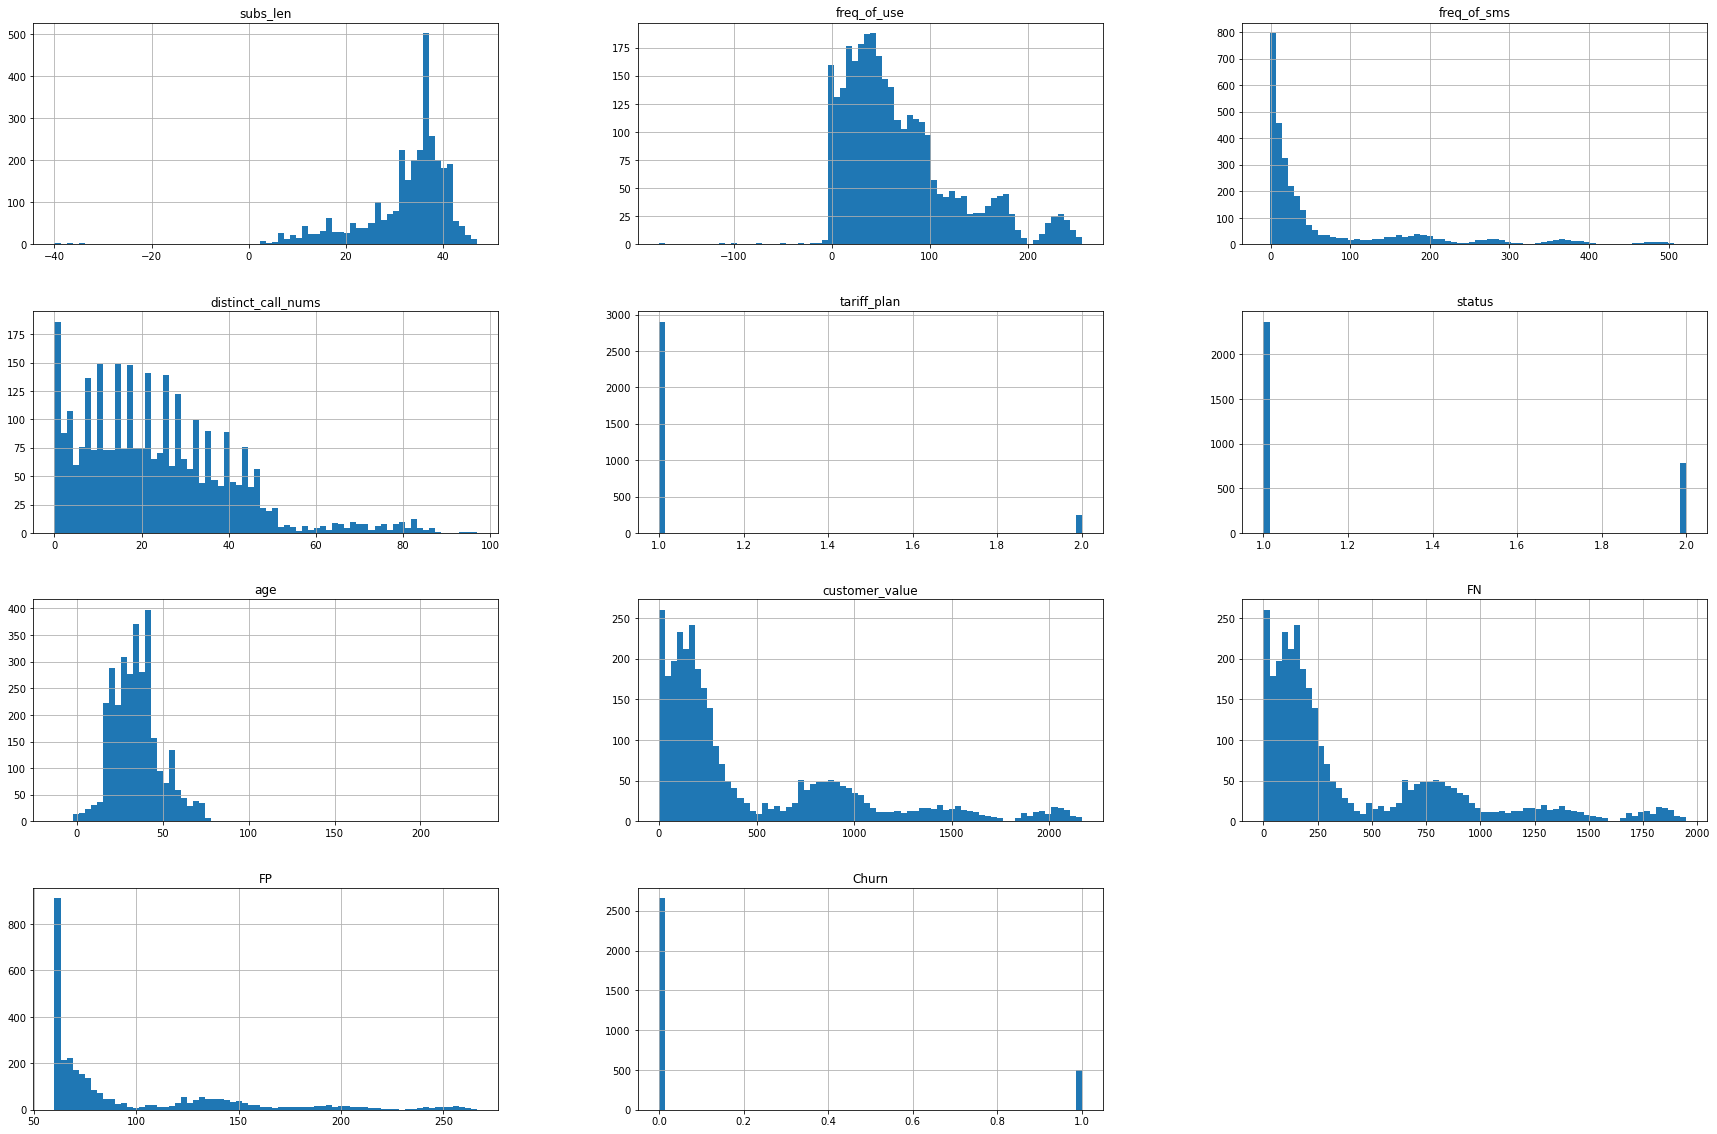

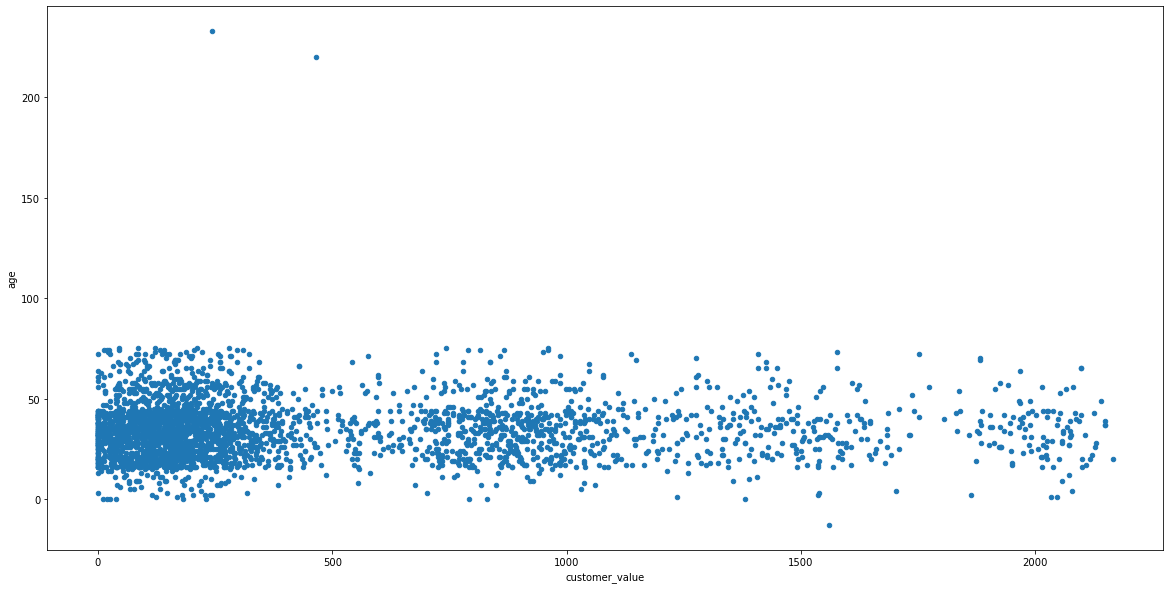

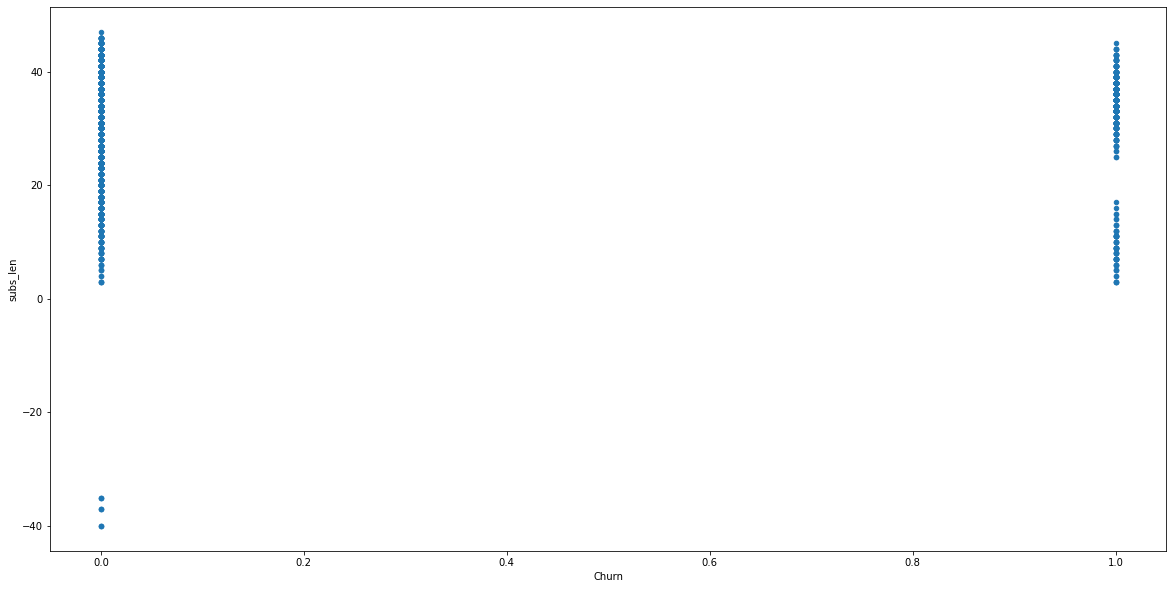

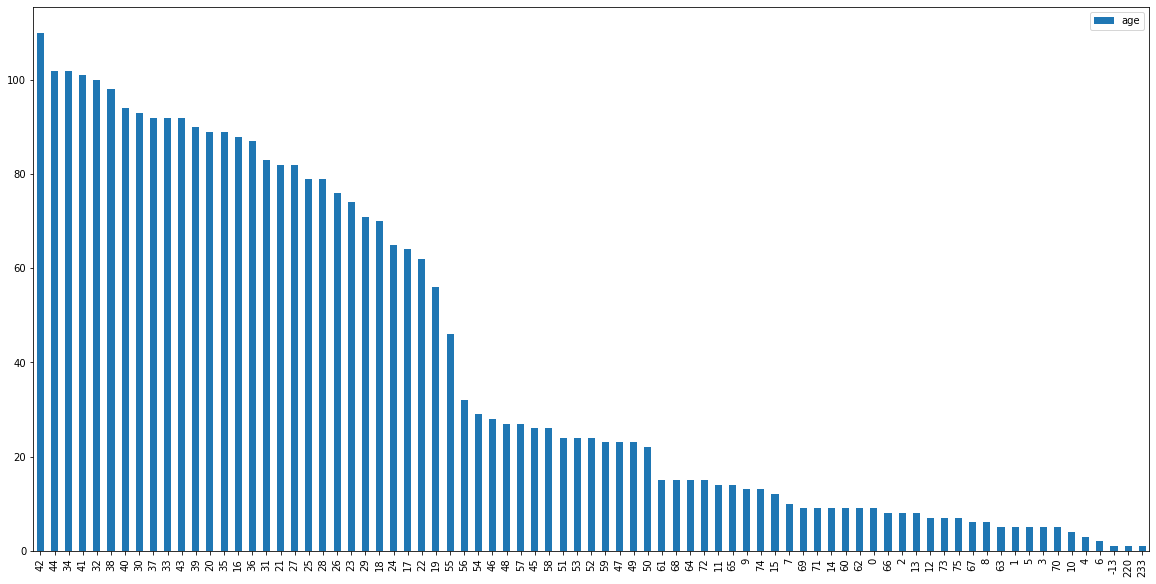

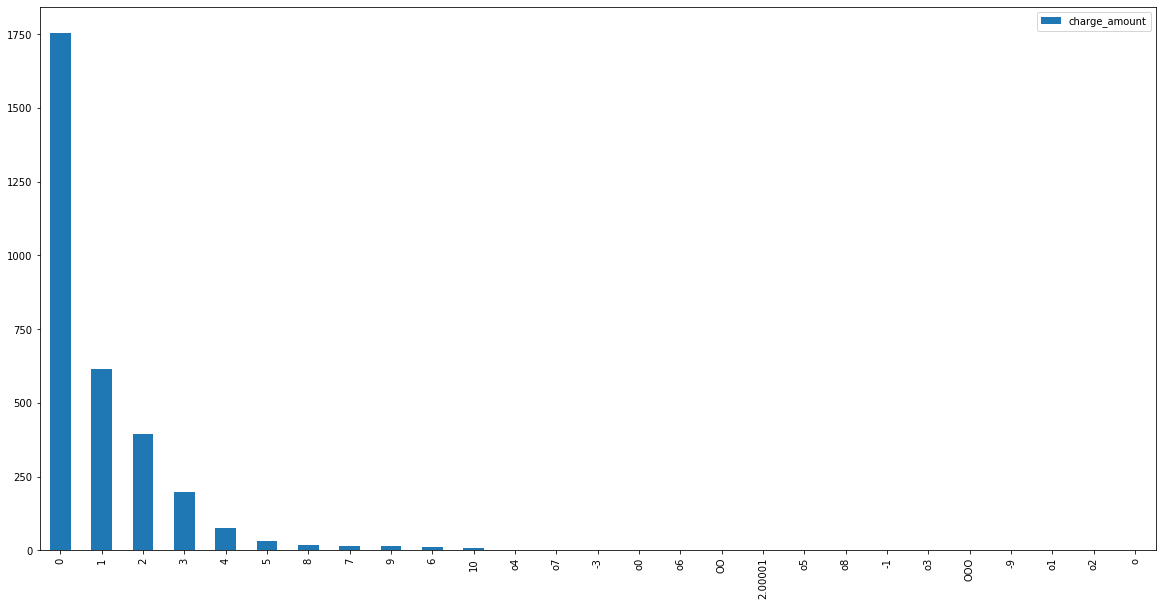

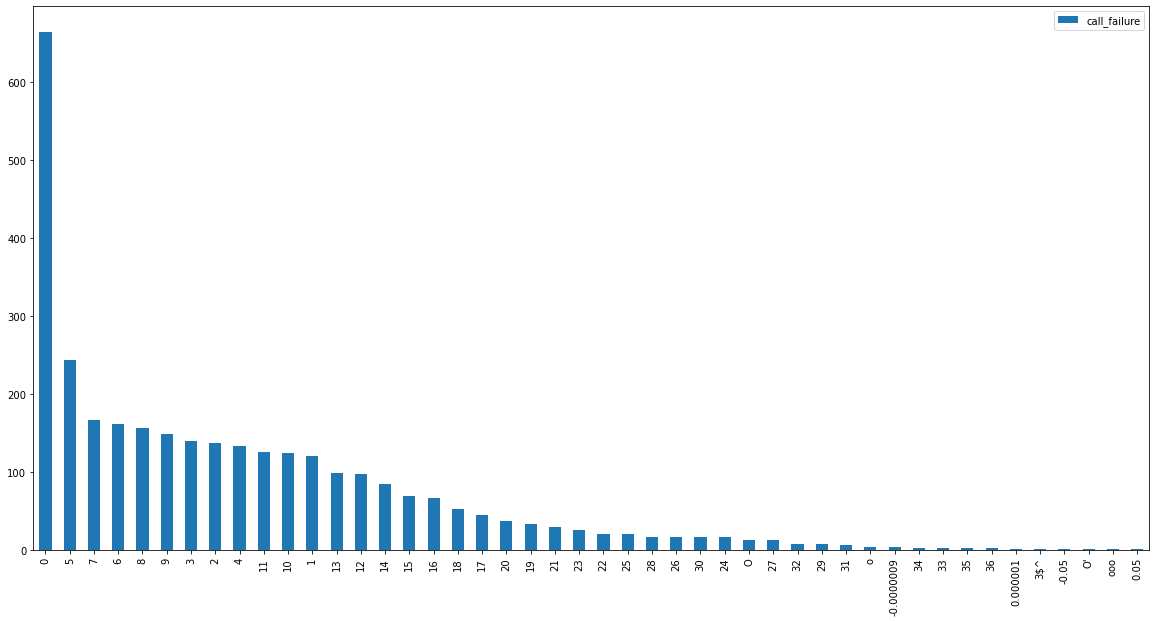

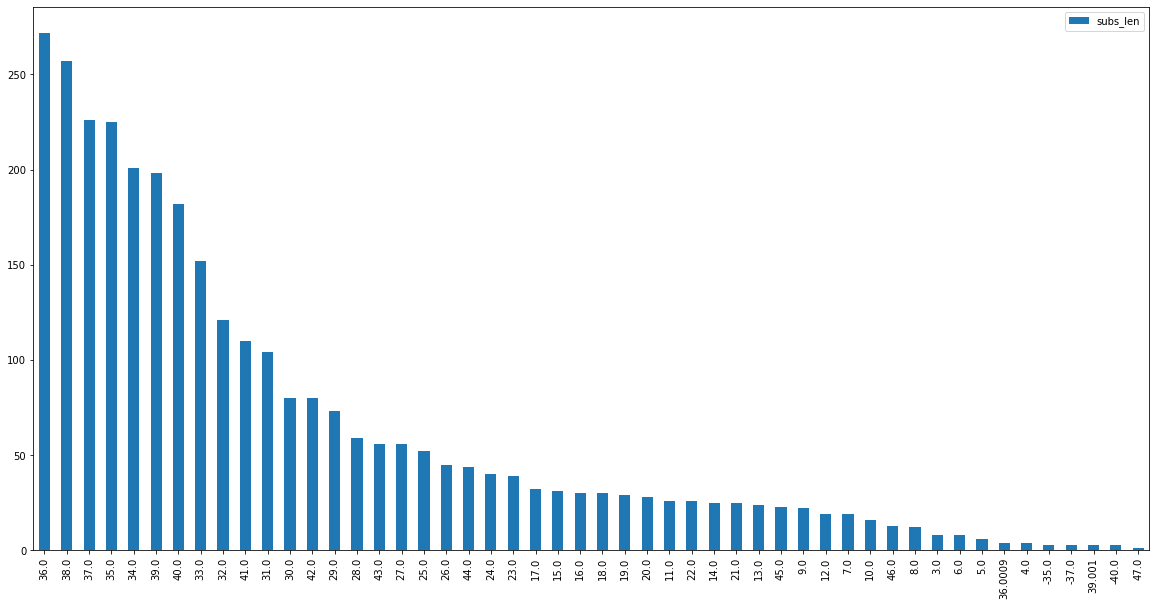

In [125]:
main()